# Team
- Agung Adipurwa
- Teguh
- Angelina

# Load Data

In [1]:
# load data
import os
import urllib.request
soal_path=os.path.join("datasets","FindIT")
download_url="https://www.kaggle.com/competitions/findit2022/data"
def fetch_data(url=download_url,path=soal_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("predict-case.csv","sample_submission.csv","train.csv"):
        file_path=os.path.join(path,filename)
        if not os.path.isfile(file_path):
            print("Download",filename)
            urllib.request.urlretrieve(url + filename,file_path)
  


In [2]:
# download data
fetch_data()

In [3]:
# call data
import pandas as pd
def load_soal_data(name,path=soal_path):
    csv_path=os.path.join(path,name)
    return pd.read_csv(csv_path, delimiter='|')

In [4]:
predict_case=load_soal_data("predict-case.csv")
sample_submission=load_soal_data("sample_submission.csv")
train_data=load_soal_data("train.csv")

# EDA

In [5]:
print(predict_case.shape)
print(sample_submission.shape)
print(train_data.shape)

(3000, 14)
(3000, 1)
(31746, 15)


salary                  25394
company_process_time     9144
job_benefits             6667
company_size             5163
experience_level         4292
company_industry         1514
employment_type          1344
salary_currency             4
job_description             1
id                          0
job_title                   0
location                    0
career_level                0
education_level             0
job_function                0
dtype: int64


c:\Dipung\Kuliah\DATCHAYI\Find_IT\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of Missing Value')

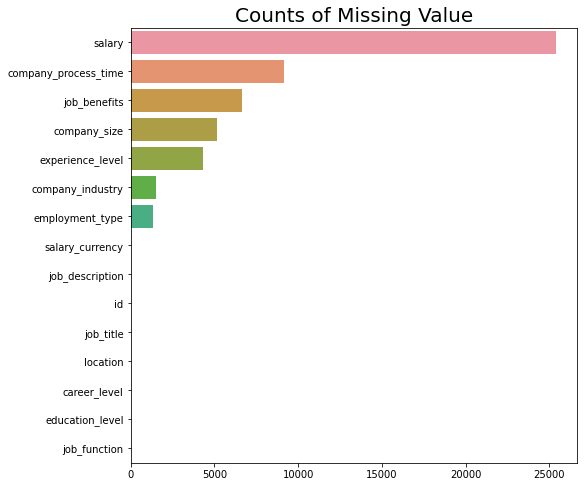

In [6]:
#Check NaN value in train_data
import matplotlib.pyplot as plt
import seaborn as sns
y = train_data.isnull().sum().sort_values(ascending=False)[:].index
x = train_data.isnull().sum().sort_values(ascending=False)[:]
print(x)
plt.figure(figsize=(8, 8))
sns.barplot(x, y)
plt.title("Counts of Missing Value: Data Train", size=20)


In [7]:
#Check NaN value in test_data
y = predict_case.isnull().sum().sort_values(ascending=False)[:].index
x = predict_case.isnull().sum().sort_values(ascending=False)[:]
print(x)
plt.figure(figsize=(8, 8))
sns.barplot(x, y)
plt.title("Counts of Missing Value: Data Train", size=20)


company_process_time    1047
job_benefits             749
company_size             480
experience_level         249
company_industry         100
id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
education_level            0
employment_type            0
job_function               0
job_description            0
dtype: int64


In [8]:
train_data["job_title"] = train_data["job_title"].apply(lambda item: str(item).lower())
len(train_data["job_title"].unique())


18343

In [9]:
train_data["job_title"].value_counts()[:30]

sales executive            312
management trainee         168
sales                      151
marketing                  132
sales engineer             129
accounting staff           126
digital marketing          106
graphic designer           101
sales marketing             98
content creator             92
barista                     84
staff accounting            83
accounting                  83
crew outlet                 81
project manager             79
sales manager               79
account executive           76
marketing executive         70
sales supervisor            63
marketing manager           59
it support                  56
account manager             55
it programmer               50
social media specialist     49
medical representative      49
teknisi                     48
admin                       47
business development        46
asisten apoteker            46
finance staff               44
Name: job_title, dtype: int64

In [10]:
train_data["location"] = train_data["location"].apply(
    lambda item: str(item).lower())
len(train_data["location"].unique())

199

In [11]:
train_data["location"].value_counts()[:60]


penuh waktu                 25940
kontrak                      3846
nan                          1344
paruh waktu                   272
magang                        193
temporer                      112
penuh waktu, kontrak           35
temporer, magang                2
penuh waktu, magang             1
penuh waktu, paruh waktu        1
Name: employment_type, dtype: int64

<AxesSubplot:>

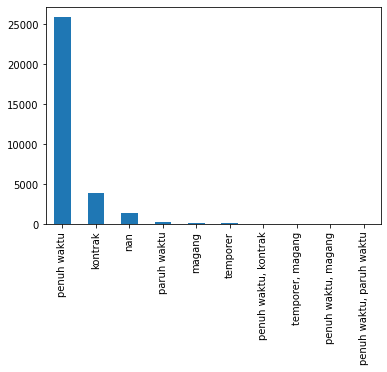

In [12]:
train_data["employment_type"] = train_data["employment_type"].apply(
    lambda item: str(item).lower())
len(train_data["employment_type"].unique())
train_data["employment_type"].value_counts()[:60]


<AxesSubplot:>

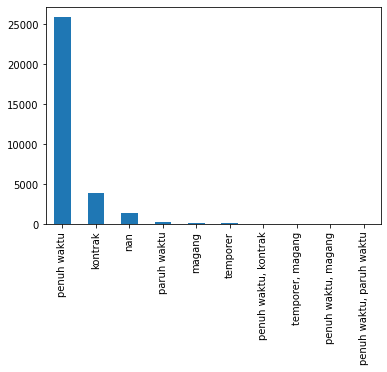

In [13]:
train_data["employment_type"].value_counts().plot(kind="bar",)


In [14]:
train_data["salary_currency"] = train_data["salary_currency"].apply(
    lambda item: str(item).lower())
len(train_data["salary_currency"].unique())
train_data["salary_currency"].value_counts()[:60]

idr    31731
usd       11
nan        4
Name: salary_currency, dtype: int64

# Cleaning Data

In [15]:
#Cleaning All NaN rows in field salary
temp_train = train_data.dropna(subset=["employment_type"])
drop_NaN_train = ["company_industry", "experience_level",
                  "company_size", "job_benefits", "company_process_time", "salary"]
for i in drop_NaN_train:
    temp_train = temp_train.dropna(subset=i)
temp_test = predict_case.dropna(subset=["company_industry"])
drop_NaN_test = ["company_industry", "experience_level",
                 "company_size", "job_benefits", "company_process_time"]
for i in drop_NaN_test:
    temp_test = temp_test.dropna(subset=i)


In [24]:
print("Clean Train Data\n{}".format(
    temp_train.isnull().sum().sort_values(ascending=False)[:]))
print("Clean Train Data\n{}".format(
    temp_test.isnull().sum().sort_values(ascending=False)[:]))


(1604, 14)


In [ ]:
print(temp_train.shape)
print(temp_test.shape)